## About the data set.

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "Match_three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. Featuring engaging levels, charming characters, and vibrant visuals, the game focuses on casual, fun gameplay designed to retain players through delightful progression and social features.

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

### How does the data look

The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

1. userid - a unique number that identifies each player.<br>
2. version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).<br>
3. sum_gamerounds - the number of game rounds played by the player during the first week after installation<br>
4. retention_1 - did the player come back and play 1 day after installing?<br>
5. retention_7 - did the player come back and play 7 days after installing?<br>

When a player installed the game, they are randomly assigned to either gate_30 or gate_40.

## Importing the data set and basic data exploration


In [2]:
import pandas as pd

file_path = r"C:\Users\Lachu\OneDrive\Documents\Visual Studio 2019\projecct_draft\cookie_cats - cookie_cats.csv.csv"
data = pd.read_csv(file_path)

# Display the first few rows and structure of the data
print(data.head())
print(data.columns)


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')


In [7]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
#checking Dataframe shape (number of rows and columns)

data.shape

(90189, 5)

In [ ]:
# Understanding data distribution (calculating mean, medium,min, max,and standard deviation of numerical data
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


### Cleaning Data

In [10]:
# checking for NaN values patients

data.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

## Exploratory Data Analysis

#### Understanding the player distribution 
Here we are finding out more about our data through exploratory data analysis.<br>
1. Finding out the total numer of players in the game.<br>
2. Finding out number of players for each version of the game(for version_30 where gate placed on level 30 and version_40 when gate is moved to level 40)<br>
3. Finding out the number of players who never played the game(sum_gamerounds=0)<br>
4. Finding out the number of players who never came back after day 1/ day 7<br>



In [11]:
#Total number of players for both versions
number_of_players =data['userid'].count()
print(number_of_players)

90189


In [12]:
#Number of players for each version

player_in_version = data.groupby('version')['userid'].size()
print(player_in_version)


version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64


In [11]:
#players who never played any rounds of the game after installing it.

data[data['sum_gamerounds'] == 0].groupby('version').count()



,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,1937,1937,1937,1937
gate_40,2057,2057,2057,2057


In [28]:
# Finding out the number of player who never returned to the game

never_returned = data[(data['retention_1'] == False) & (data['retention_7'] == False)]
number_of_never_returned = never_returned.groupby('version').size()
print(number_of_never_returned)

version
gate_30    22840
gate_40    23597
dtype: int64


1. 90189 is the total numer of players in the game.<br>
2.  number of players for each version of the game(for version_30 where gate placed on level 30 and version_40 when gate is moved to level 40)<br>
gate_30    44700
gate_40    45489
3. Finding out the number of players who never played the game(sum_gamerounds=0)<br>
gate_30	1937
gate_40	2057

4. Finding out the number of players who never came back after day 1/ day 7<br>
gate_30    22840
gate_40    23597



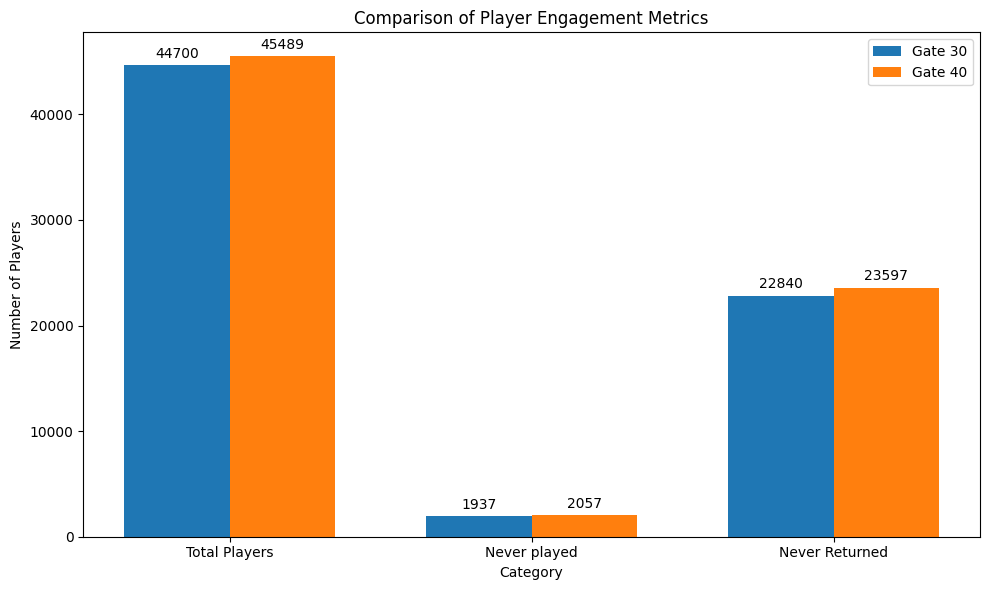

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Total Players', 'Never played', 'Never Returned']
gate_30 = [44700, 1937, 22840]
gate_40 = [45489, 2057, 23597]
bar_width = 0.35
x = np.arange(len(categories))

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, gate_30, bar_width, label='Gate 30', color='#1f77b4')
bars2 = ax.bar(x + bar_width/2, gate_40, bar_width, label='Gate 40', color='#ff7f0e')

# Labels and Titles
ax.set_xlabel('Category')
ax.set_ylabel('Number of Players')
ax.set_title('Comparison of Player Engagement Metrics')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Add numbers to each bar
add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


#### Data Analysis on player retention
We're trying to find out the retention of players in the game after day 1 and day 7.<br>
1. Finding out the number of players came back after day 1 (for version_30 and version_40)<br>
2. Finding out the number of players came back after day 7 (for version_30 and version_40)<br>
3. Comparing the retention for both version to find out if the gate placement affects the retention<br>



In [32]:
# Data for version 30 and version 40
version_30 = data[data['version'] == 'gate_30']
version_40 = data[data['version'] == 'gate_40']


#Number of players came back in version_30 and version_40 after day 1


version_30_day1_number = version_30['retention_1'].sum()
version_40_day1_number = version_40['retention_1'].sum()

print("Player's returned for version 30 after day 1:",version_30_day1_number)
print("Player's returned for version_40 after day 1:", version_40_day1_number)

#Number of players came back in version_30 and version_40 after day 7

version_30_day7_number = version_30['retention_7'].sum()
version_40_day7_number = version_40['retention_7'].sum()

print("Player's returned for version 30 after day 7:",version_30_day7_number)
print("Player's returned for version_40 after day 7:", version_40_day7_number)


Player's returned for version 30 after day 1: 20034
Player's returned for version_40 after day 1: 20119
Player's returned for version 30 after day 7: 8502
Player's returned for version_40 after day 7: 8279


In [39]:
#calculating the mean values for both versions for day 1 retention
version_30_day1_mean = version_30['retention_1'].mean()*100
version_40_day1_mean = version_40['retention_1'].mean()*100
print("Mean for version 30 after day 1:",version_30_day1_mean)
print("Mean for version_40 after day 7:", version_40_day1_mean)

#calculating the mean values for both versions for day 7 retention
version_30_day7_mean = version_30['retention_7'].mean()*100
version_40_day7_mean = version_40['retention_7'].mean()*100
print("Mean for version 30 after day 7:",version_30_day7_mean)
print("Mean for version_40 after day 7:", version_40_day7_mean)

Mean for version 30 after day 1: 44.81879194630872
Mean for version_40 after day 7: 44.22827496757458
Mean for version 30 after day 7: 19.020134228187917
Mean for version_40 after day 7: 18.200004396667328


#### Observation:
Looking at the number of players and the mean values for both the version, "version_30" has managed to retain more players by a slight margin. This game has a user base of more than a million this slight difference might become significant, so a statistical analysis of this data could reveal more. 


To compare the retention rates between the two game versions (gate_30 and gate_40) in the Cookie Cats dataset, we can use a Statistical test to  check for any  significant differences. 
Before determining which statistical test to be used let's look at the normality of data for both versions.
To do that we need to see how the data is distributed for both versions
Lets plot the data to see that

Text(0, 0.5, 'User Count')

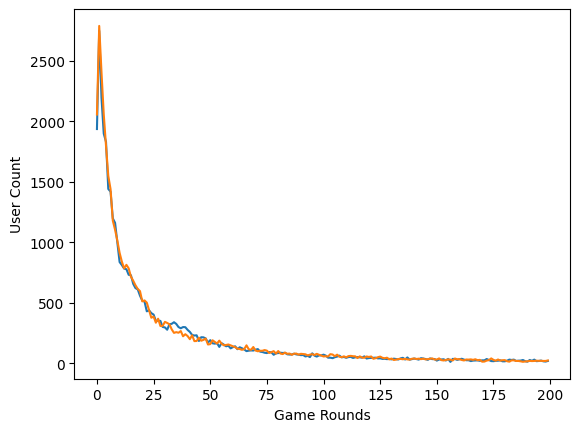

In [238]:
# Counting the number of players for each number of game rounds 
plot_df_30 = version_30.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players
ax = plot_df_30.head(n=200).plot(x="sum_gamerounds", y="userid")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

plot_df_40 = version_40.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players
ax = plot_df_40.head(n=200).plot(x="sum_gamerounds", y="userid")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

Let's plot the sum_gamerounds to see how it is distributed across both versions

Both versions doesn't have a normal distribution from the graphs.If the distribution is symmetric, then the mean is equal to the median, and the distribution has zero skewness. Let's apply skew() to our data to findout.

In [3]:
data.skew(axis=0,skipna=True,numeric_only=True)

userid             -0.001290
sum_gamerounds    185.436313
retention_1         0.220493
retention_7         1.613430
dtype: float64

In [ ]:
#version_30 
version_30.skew(axis=0,skipna=True,numeric_only=True)

userid              0.003736
sum_gamerounds    163.709871
retention_1         0.208377
retention_7         1.578806
dtype: float64

In [279]:
#version_40
version_40.skew(axis=0,skipna=True,numeric_only=True)

userid           -0.006241
sum_gamerounds    5.967288
retention_1       0.232430
retention_7       1.648386
dtype: float64

version_30 has a very high skew value for sum_gamerounds compared to version_40, this could be due to extreme outliers in data. Box plots of sum_gamerounds for both versions could help to see the outliers.

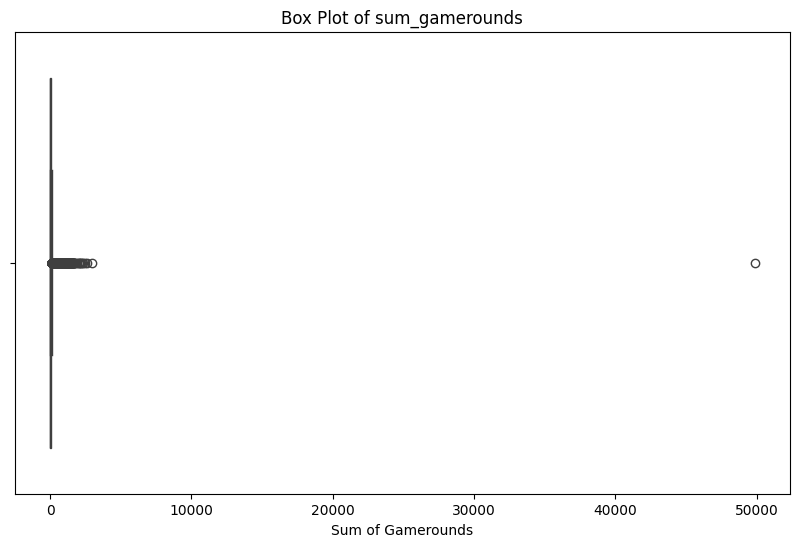

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for sum_gamerounds
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sum_gamerounds'])
plt.title('Box Plot of sum_gamerounds')
plt.xlabel('Sum of Gamerounds')
plt.show()

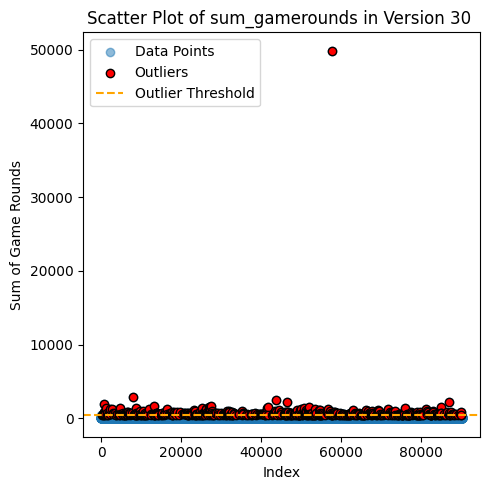

In [29]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for version_30
version_30_data = data[data['version'] == 'gate_30']

# Set thresholds for identifying outliers based on sum_gamerounds
mean = version_30_data['sum_gamerounds'].mean()
std_dev = version_30_data['sum_gamerounds'].std()
outlier_threshold = mean + 1.5* std_dev

# Identify outliers
outliers = version_30_data[version_30_data['sum_gamerounds'] > outlier_threshold]

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(version_30_data.index, version_30_data['sum_gamerounds'], alpha=0.5, label='Data Points')
plt.scatter(outliers.index, outliers['sum_gamerounds'], color='red', label='Outliers', edgecolors='black')
plt.axhline(outlier_threshold, color='orange', linestyle='--', label='Outlier Threshold')

# Labels and title
plt.title('Scatter Plot of sum_gamerounds in Version 30 ')
plt.xlabel('Index')
plt.ylabel('Sum of Game Rounds')
plt.legend()
plt.tight_layout()
plt.show()


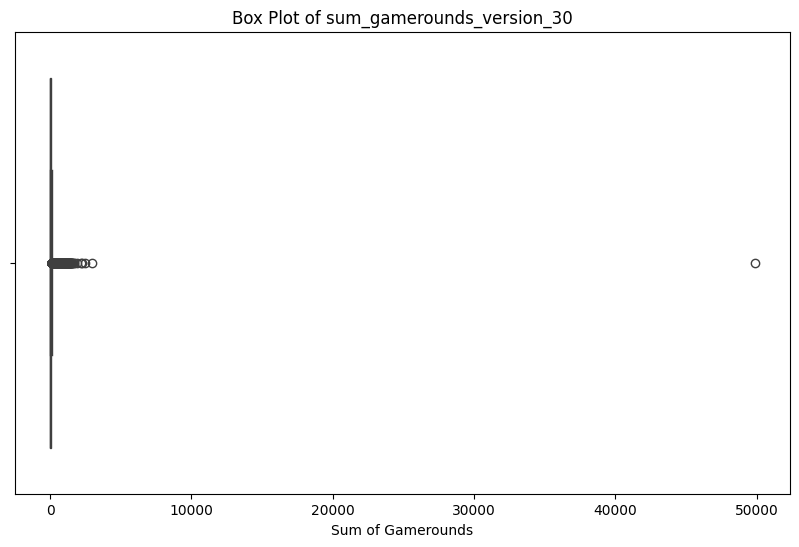

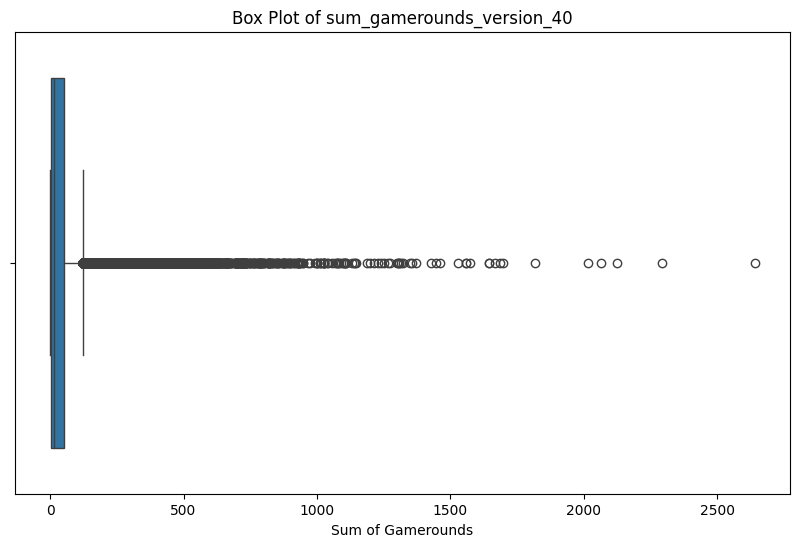

In [281]:
# Data for version 30 and version 40
version_30 = data[data['version'] == 'gate_30']
version_40 = data[data['version'] == 'gate_40']
# Create a box plot for sum_gamerounds for version_30
plt.figure(figsize=(10, 6))
sns.boxplot(x=version_30['sum_gamerounds'])
plt.title('Box Plot of sum_gamerounds_version_30')
plt.xlabel('Sum of Gamerounds')
plt.show()
# Create a box plot for sum_gamerounds for version_40
plt.figure(figsize=(10, 6))
sns.boxplot(x=version_40['sum_gamerounds'])
plt.title('Box Plot of sum_gamerounds_version_40')
plt.xlabel('Sum of Gamerounds')
plt.show()

It shows an extreme outlier in version_30, Let's investigate more about this outlier value. Since thats the only outlier with sum-gamerounds more than 40000, find out the entry that satisfies the condition

In [252]:
data.loc[data['sum_gamerounds'] > 40000]


,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


let's calculate the mean sum_gamerounds value for version 30 with and without outliers

In [253]:
version_30['sum_gamerounds'].mean()

np.float64(52.45626398210291)

In [254]:
#filtering the data for version_30 with sum_gamerounds below 40000
filtered_version_30 = version_30[version_30['sum_gamerounds']<40000]
filtered_version_30['sum_gamerounds'].mean()

np.float64(51.342110561757536)

In [255]:
#maximum value of sum_gamerounds before and after dropping the outlier
print("version_30 maximum value for sum_gamerounds with outlier data =",version_30['sum_gamerounds'].max())
print("version 30 maximum value for sum_gamerounds after filtering outlier =",filtered_version_30['sum_gamerounds'].max())
print("version_40 maximum value for sum_gamerounds =",version_40['sum_gamerounds'].max())


version_30 maximum value for sum_gamerounds with outlier data = 49854
version 30 maximum value for sum_gamerounds after filtering outlier = 2961
version_40 maximum value for sum_gamerounds = 2640


To have a balanced calculation of players engagement level mean value is important, since the mean value excluding the outlier represent the majority of players we are considering the filtered version_30 data for analysis

Filtering the extreme outlier narrows down the maximum sum_gamerounds number under 3000. So we are using data with in this range for further analysis

In [33]:
sum_gamerounds_version_30 =version_30[version_30['sum_gamerounds']<3000]
sum_gamerounds_version_40 =version_40[version_40['sum_gamerounds']<3000]

Now we have our data, let's check the normality of data. Let's look at the skew values. Skewness is a measure of the asymmetry of a distribution.  A normal distribution has zero skew and is an assumption of many statistical procedures.

In [257]:
#for version_30
sum_gamerounds_version_30.skew(axis=0,skipna=True,numeric_only=True)

userid            0.003767
sum_gamerounds    5.940397
retention_1       0.208336
retention_7       1.578956
dtype: float64

In [258]:
#for version_40
sum_gamerounds_version_40.skew(axis=0,skipna=True,numeric_only=True)

userid           -0.006241
sum_gamerounds    5.967288
retention_1       0.232430
retention_7       1.648386
dtype: float64

Creating a Q-Q plot to understand the skewness of the data

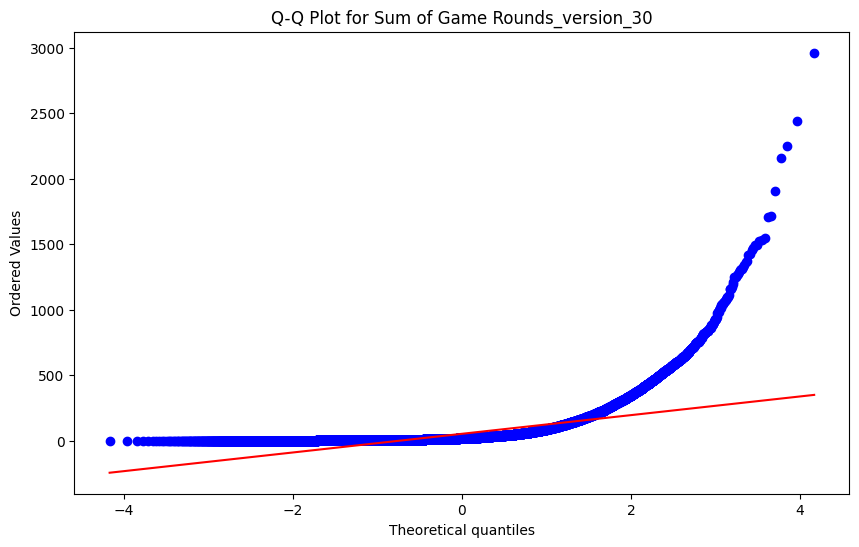

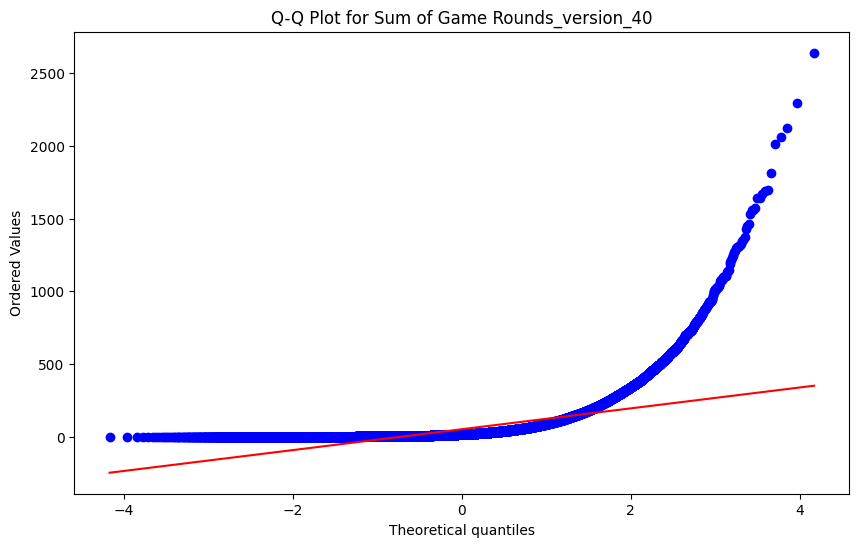

In [41]:
import numpy as np
from scipy import stats
#Q-Q Plot for version_30
plt.figure(figsize=(10,6))
stats.probplot(sum_gamerounds_version_30['sum_gamerounds'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Sum of Game Rounds_version_30')
plt.show()
#Q-Q Plot for version_40
plt.figure(figsize=(10, 6))
stats.probplot(sum_gamerounds_version_40['sum_gamerounds'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Sum of Game Rounds_version_40')
plt.show()

Lets run a normality test to confirm this,Some of the Normality tests available are  with Kolmogorov-Smirnov, Shapiro–Wilk test ,skewness and kurtosis etc. If the sample sizes are small <50 Shapiro–Wilk test is recommended. But In this case we'll be using Kolmogorov-Smirnov because of the large data sample size.

In [298]:
from scipy.stats import kstest
# Standardizing the 'sum_gamerounds' column for version_30
standardized_data = (sum_gamerounds_version_30['sum_gamerounds'] -
                     sum_gamerounds_version_30['sum_gamerounds'].mean()) / sum_gamerounds_version_30['sum_gamerounds'].std()
# Running the Kolmogorov-Smirnov test
statistic, p_value = kstest(standardized_data, 'norm')
# Displaying the results
print(f"Kolmogorov-Smirnov statistic: {statistic}")
print(f"P-value: {p_value}")

Kolmogorov-Smirnov statistic: 0.30745754693410166
P-value: 0.0


The result p=0 means that  the null hypothesis (that the data follows a normal distribution) is rejected.This means that data does not follow a normal distribution.

Both versions have positive skew values for retention_1, retention_7  so it is not normally distributed. So we need to run a  non parametrics test.The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y.

Null hypothesis: There is no difference in retention between the two versions version_30 and version_40. <br>
Alternative hypothesis: There is a difference in retention between version_30 and version_40.

In [37]:
import scipy.stats as stats

# Mann-Whitney U test for retention Day 1
retention_day1_version_30 = sum_gamerounds_version_30['retention_1']
retention_day1_version_40 = sum_gamerounds_version_40['retention_1']

u_stat_day1, p_value_day1 = stats.mannwhitneyu(retention_day1_version_30, retention_day1_version_40, alternative='two-sided')

print(f"Mann-Whitney U test for Day 1 retention:")
print(f"U-statistic: {u_stat_day1}, p-value: {p_value_day1}")

# Perform the Mann-Whitney U test for retention Day 7
retention_day7_version_30 = sum_gamerounds_version_30['retention_7']
retention_day7_version_40 = sum_gamerounds_version_40['retention_7']

u_stat_day7, p_value_day7 = stats.mannwhitneyu(retention_day7_version_30, retention_day7_version_40, alternative='two-sided')

print(f"\nMann-Whitney U test for Day 7 retention:")
print(f"U-statistic: {u_stat_day7}, p-value: {p_value_day7}")

if p_value_day1 < 0.05:
    print("Day 1:  Reject the null hypothesis. This suggests a statistically significant difference between the groups.")
else:
    print("Day 1: Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.")

if p_value_day7 < 0.05:
    print("Day 7:  Reject the null hypothesis. This suggests a statistically significant difference between the groups.")
else:
    print("Day 7: Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.")



Mann-Whitney U test for Day 1 retention:
U-statistic: 1022670128.0, p-value: 0.073922385401239

Mann-Whitney U test for Day 7 retention:
U-statistic: 1024975889.5, p-value: 0.0015918697815176372
Day 1: Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.
Day 7:  Reject the null hypothesis. This suggests a statistically significant difference between the groups.


Here the day 7 retention data suggests a stastically significant difference between the groups. Considering the higher day 7 retention ratention for version _30 let's do another test with <br>
Null hypothesis: There is no difference in retention between version_30 and version_40. <br>
Alternative hypothesis: Version_30 has higher retention than version_40



In [ ]:


# For Day 7 Retention (one-sided test)
stat_day7, p_value_day7 = mannwhitneyu(retention_day7_version_30,retention_day7_version_40, alternative='greater')


print(f"Day 7 Test - U-statistic: {stat_day7}, P-value: {p_value_day7}")

# Decision based on p-value for day_7 retention


if p_value_day7 < 0.05:
    print("Day 7: Reject the null hypothesis: This suggests Version_30 has higher retention than version_40.")
else:
    print("Day 7: Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.")


Day 7 Test - U-statistic: 1024975889.5, P-value: 0.0007959348907588186
Day 7: Reject the null hypothesis: This suggests Version_30 has higher retention than version_40.


### Conclusions from data analysis for retention and following up with a statistical test .<br>
#### Insights from Data analysis for retention
1. Number of players retained after day 1 is higher for version_40 (20119 players)<br>
2. Number of players retaind after day 7 is higher for version_30 (8502 players) <br>
3. Mean value of players returned for version 30 after day 1: 44.81879194630872<br>
4. Mean value of players returned for version_40 after day 7: 44.22827496757458<br>
5. Mean value of players returned for version 30 after day 7: 19.020134228187917<br>
6. Mean value of players returned for version_40 after day 7: 18.200004396667328<br>

The mean value difference between both the versions is very marginal which makes it hard to draw a conclusion only depending on them.<br>
While looking at the skew value for data, it is understood that data is not normally distributed,<br>
So a statistical test (Mann-Whitney U test) is done to examine the p-values of both versions on retentions to understand statistical significance.

#### Statistical test results from Mann_whitney both both versions on day 1 and day 7 retention <br>
1. Day 1: Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.<br>
2. Day 7:  Reject the null hypothesis. This suggests a statistically significant difference between the groups.<br>
#### Second Mann-Whitney U test(one -sided) on day_7 retention 
Retention rates for day 7 retention is statistically significant, a higher number of players have returned for "version 30" (When the gate placement was in level 30 ) . So this placement appears to retain more users in a long term.


### Visualisation of data analysis for player retention

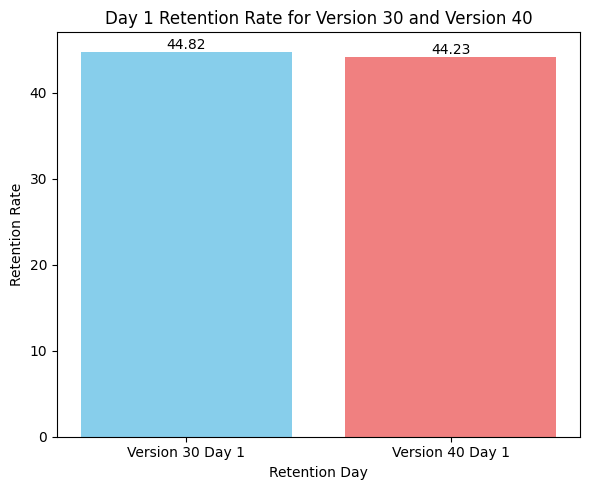

In [171]:

# Bar plot of retention rates

import matplotlib.pyplot as plt


retention_rates = [version_30_day1_mean, version_40_day1_mean]
days = ['Version 30 Day 1', 'Version 40 Day 1']

plt.figure(figsize=(6, 5))  
bars = plt.bar(days, retention_rates, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel("Retention Day")
plt.ylabel("Retention Rate")
plt.title("Day 1 Retention Rate for Version 30 and Version 40")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()


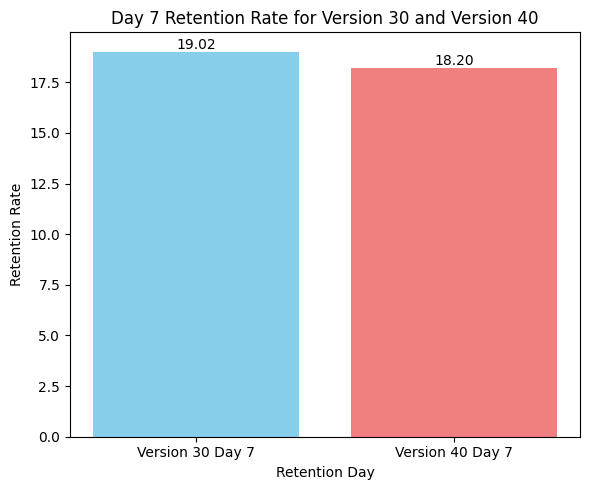

In [70]:
 #Bar plot of retention rates

import matplotlib.pyplot as plt


retention_rates = [version_30_day7_mean, version_40_day7_mean]
days = ['Version 30 Day 7', 'Version 40 Day 7']

plt.figure(figsize=(6, 5))  
bars = plt.bar(days, retention_rates, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel("Retention Day")
plt.ylabel("Retention Rate")
plt.title("Day 7 Retention Rate for Version 30 and Version 40")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}",ha='center', va='bottom', fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()


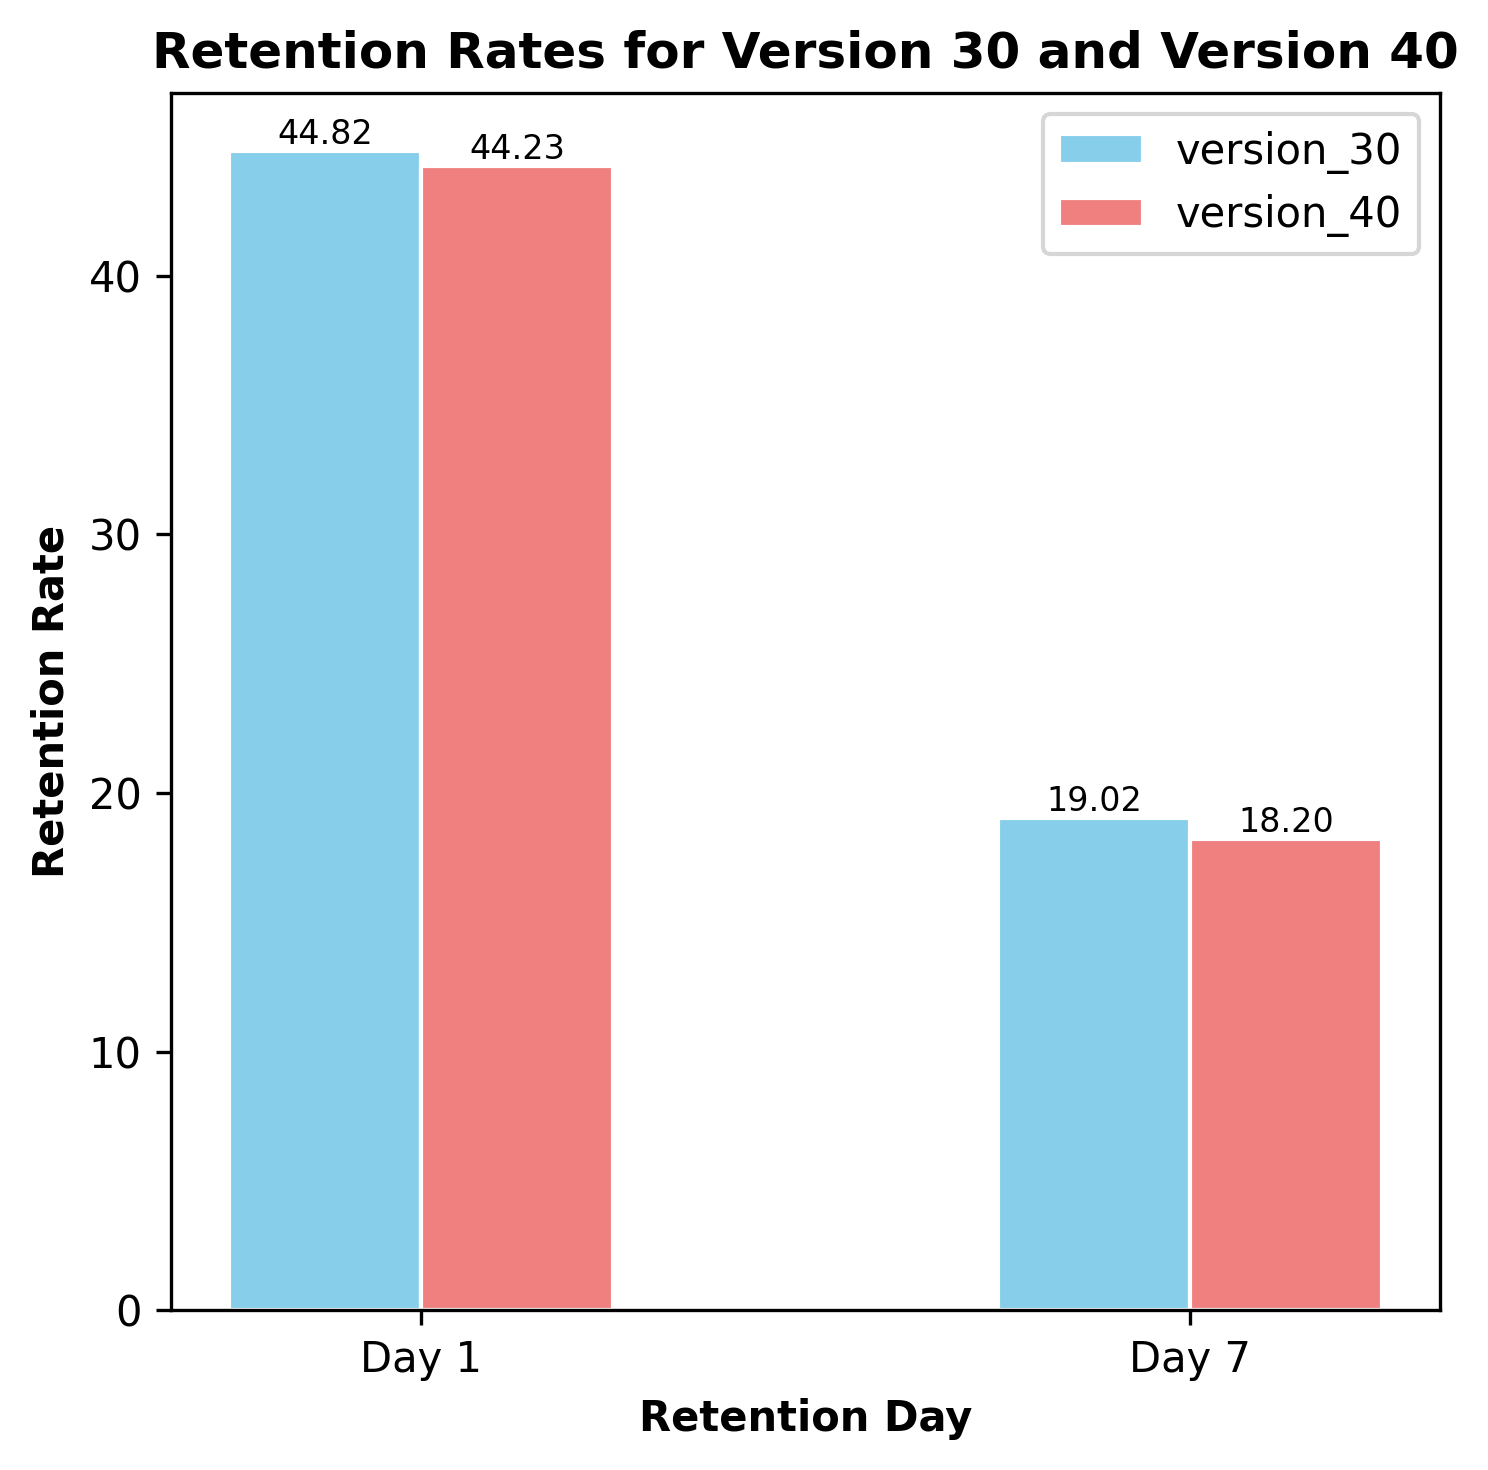

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Data for retention rates
bars1 = [version_30_day1_mean, version_30_day7_mean] 
bars2 = [version_40_day1_mean, version_40_day7_mean]

# Bar width and positions
barWidth = 0.25
r = np.arange(len(bars1)) 
r2 = r + barWidth  

# Plotting
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)  # Changed figsize to (5, 5)
ax.bar(r, bars1, color='skyblue', width=barWidth, edgecolor='white', label='version_30')
ax.bar(r2, bars2, color='lightcoral', width=barWidth, edgecolor='white', label='version_40')

# Xticks and labels
ax.set_xlabel('Retention Day', fontweight='bold')
ax.set_ylabel('Retention Rate', fontweight='bold')
ax.set_xticks(r + barWidth / 2)
ax.set_xticklabels(['Day 1', 'Day 7'])
ax.set_title('Retention Rates for Version 30 and Version 40', fontweight='bold')

# Add values to bars
for pos, height in zip(r, bars1):
    ax.text(pos, height, f"{height:.2f}", ha='center', va='bottom', fontsize=8)
for pos, height in zip(r2, bars2):
    ax.text(pos, height, f"{height:.2f}", ha='center', va='bottom', fontsize=8)

# Legend and show
ax.legend()
plt.tight_layout()
plt.show()


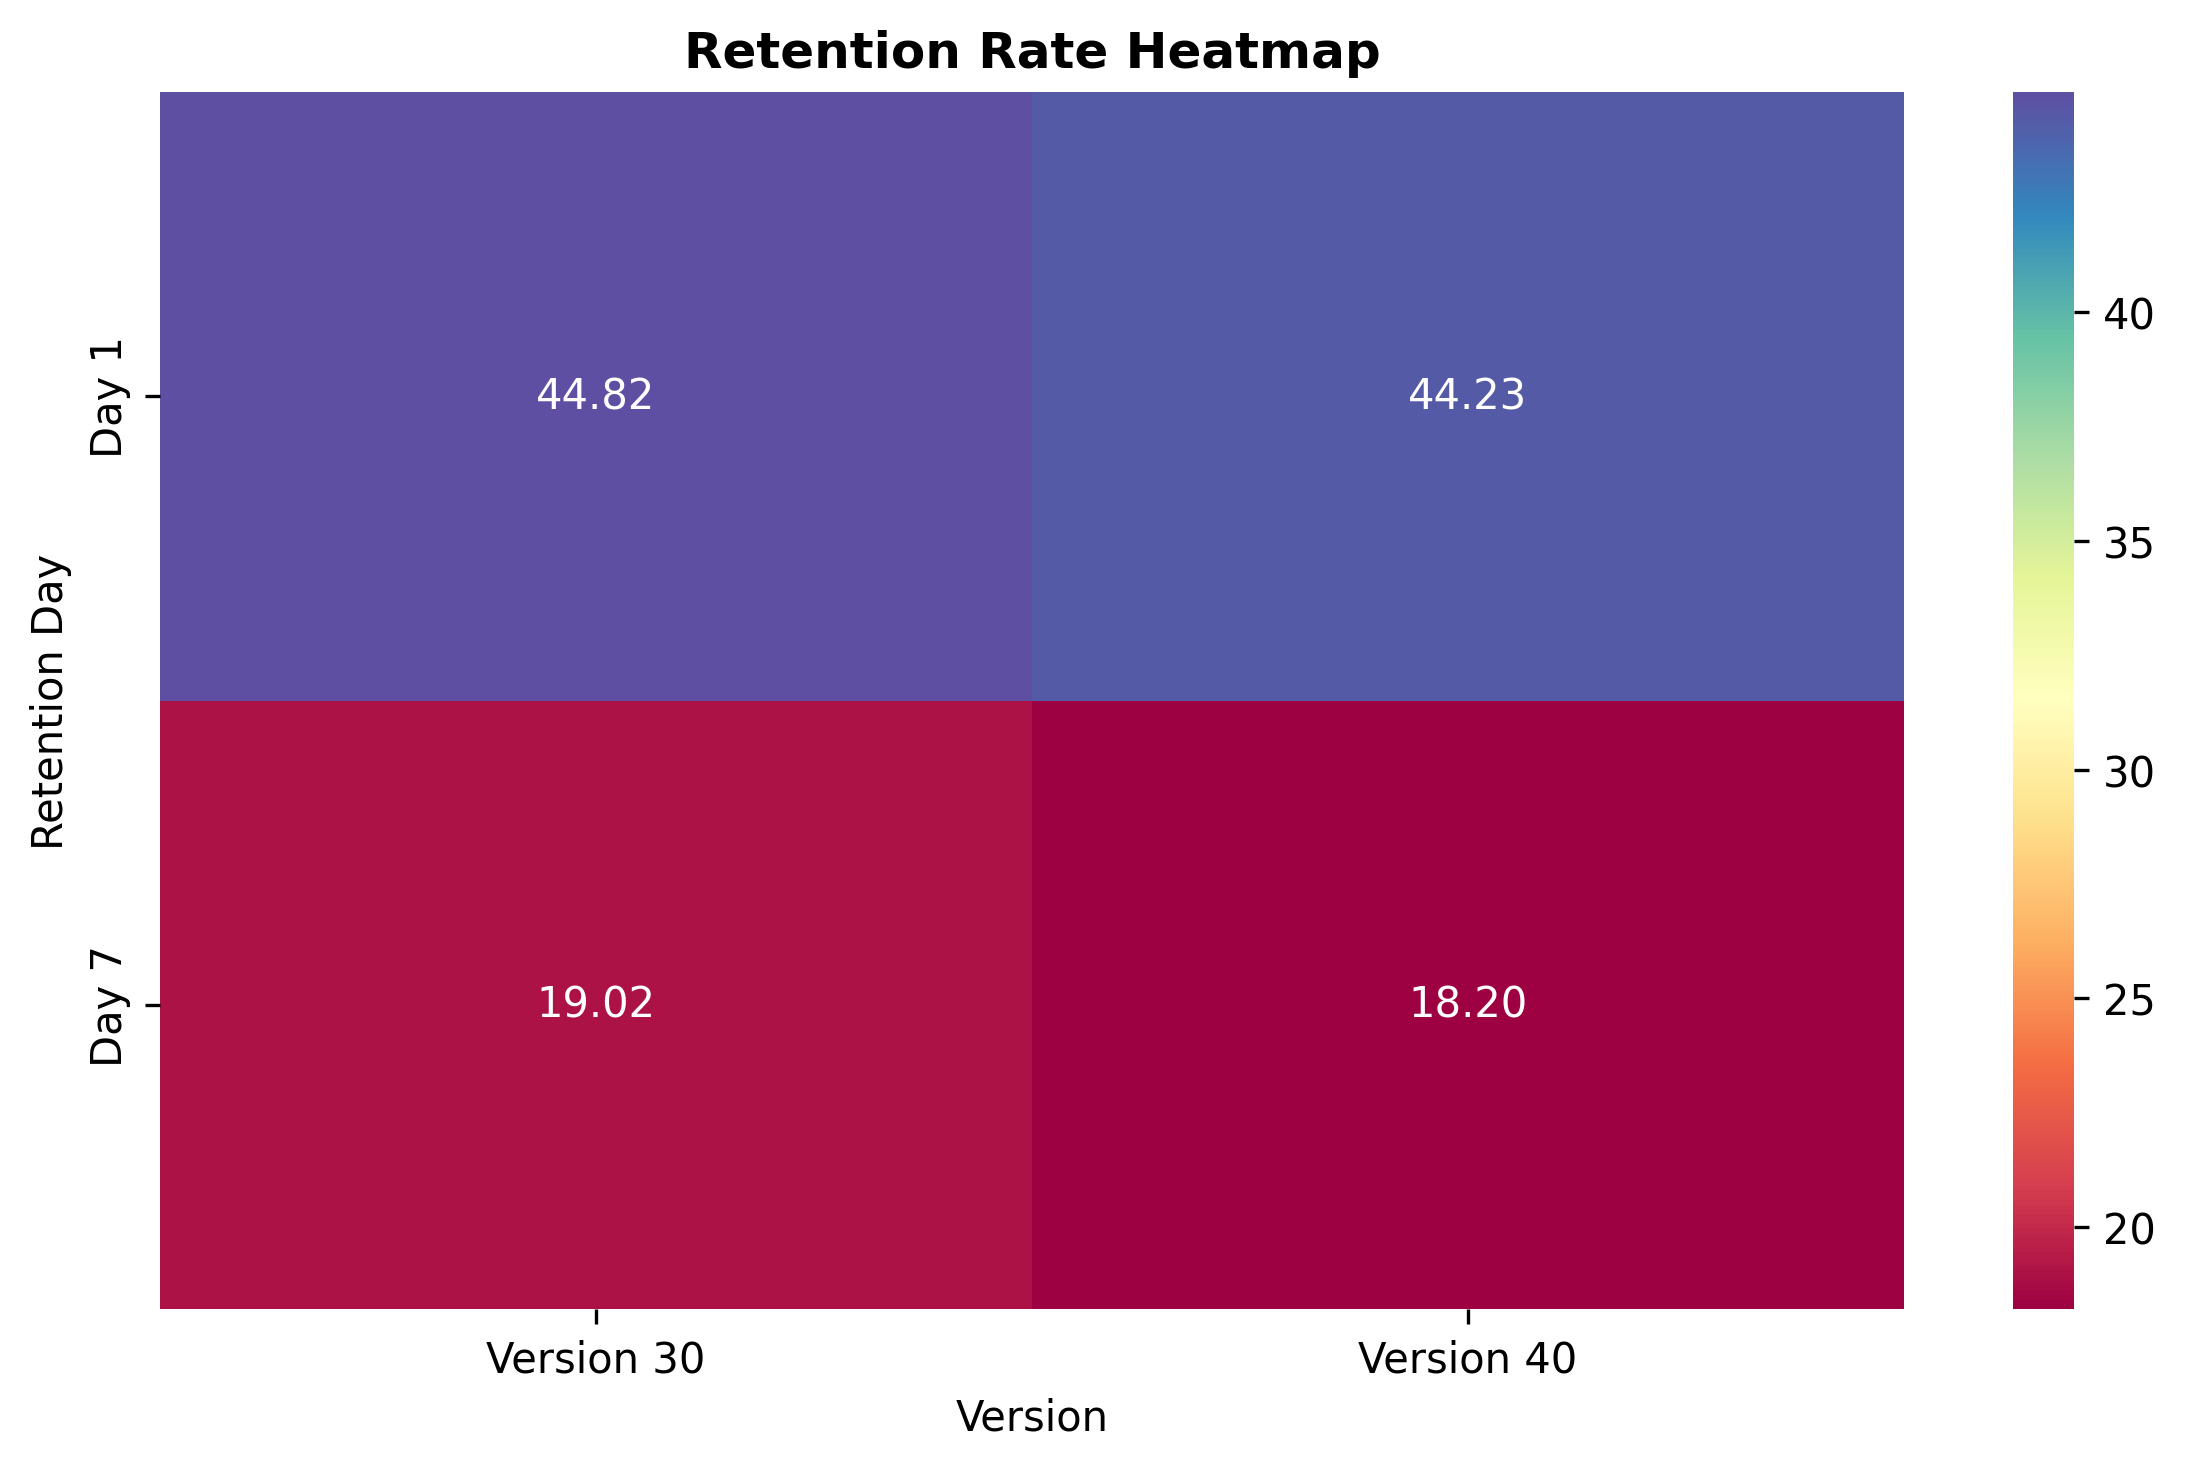

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data
data = np.array([[version_30_day1_mean, version_40_day1_mean] ,[version_30_day7_mean, version_40_day7_mean]])
days = ['Day 1', 'Day 7']
versions = ['Version 30', 'Version 40']

# Plotting
plt.figure(figsize=(8, 5), dpi=300)
sns.heatmap(data, annot=True, cmap="Spectral", xticklabels=versions, yticklabels=days, fmt=".2f")

# Add title
plt.title('Retention Rate Heatmap', fontweight='bold')
plt.xlabel('Version')
plt.ylabel('Retention Day')
plt.tight_layout()
plt.show()


### Analysis on relation between player engagement level and retention for both versions

The objective is to see if the placement of the gate influences how many rounds players complete before they leave the game.<br>
Or to see if moving the gate to level 40 will help to retain more higly engaged players in the game.
For doing this analysis , players are categorized based on their level of engagement in the game.<br>
The categorization is done based on the mean and medium values of the "sum_gamerounds".<br>



Let's do it for each version

Now we are trying to categorize the players based on their engagement level in both versions. For that we are finding out mean and medium value of sum_gamerounds in both versions of the game

In [263]:
#Finding mean and median values for sum_gamerounds for both versions of the game
mean_gamerounds_version_30 = sum_gamerounds_version_30['sum_gamerounds'].mean()
median_gamerounds_version_30 = sum_gamerounds_version_30['sum_gamerounds'].median()
print("Mean value of gamerounds for version_30 is:",mean_gamerounds_version_30)
print("Median value of sum_gamerounds for version_30 is:",median_gamerounds_version_30)
mean_gamerounds_version_40 = sum_gamerounds_version_40['sum_gamerounds'].mean()
median_gamerounds_version_40 = sum_gamerounds_version_40['sum_gamerounds'].median()
print("Mean value of sum_gamerounds for version_40 is:",mean_gamerounds_version_40)
print("Median value of sum_gamerounds for version_40 is:",median_gamerounds_version_40)

Mean value of gamerounds for version_30 is: 51.342110561757536
Median value of sum_gamerounds for version_30 is: 17.0
Mean value of sum_gamerounds for version_40 is: 51.29877552814966
Median value of sum_gamerounds for version_40 is: 16.0


Now let's categorize the players into "Low Engagement", "Moderate to High Engagement","Very High Engagement", based on total number of rounds of game played by them

In [264]:
# function to categorize engagement based on mean and median values for version_30

def categorize_engagement(rounds, median_value, mean_value):
    """
    Categorize engagement level based on sum of game rounds.

    Arguments:
    rounds: Number of game rounds played.
    median_value: Median value of sum_gamerounds for the dataset.
    mean_value: Mean value of sum_gamerounds for the dataset.

    Returns:
    str: Engagement category (Low, Moderate, High, Very High).
    """
    
    if rounds < 0.5 * median_value:
        return 'Low Engagement'
    elif 0.5 * median_value <= rounds < mean_value:
        return 'Moderate to High Engagement'
    else:
        return 'Very High Engagement'


In [266]:
# Apply the categorization and create a new column for engagement levels in version_30 and version 40
sum_gamerounds_version_30['engagement_level_version_30'] = sum_gamerounds_version_30['sum_gamerounds'].apply(lambda rounds: categorize_engagement(rounds, median_gamerounds_version_30, mean_gamerounds_version_30))
sum_gamerounds_version_40['engagement_level_version_40'] = sum_gamerounds_version_40['sum_gamerounds'].apply(lambda rounds: categorize_engagement(rounds, median_gamerounds_version_40, mean_gamerounds_version_40))

sum_gamerounds_version_40


C:\Users\Lachu\AppData\Local\Temp\ipykernel_18336\1222424775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_gamerounds_version_30['engagement_level_version_30'] = sum_gamerounds_version_30['sum_gamerounds'].apply(lambda rounds: categorize_engagement(rounds, median_gamerounds_version_30, mean_gamerounds_version_30))


,userid,version,sum_gamerounds,retention_1,retention_7,engagement_level_version_40
2,377,gate_40,165,True,False,Very High Engagement
3,483,gate_40,1,False,False,Low Engagement
4,488,gate_40,179,True,True,Very High Engagement
5,540,gate_40,187,True,True,Very High Engagement
7,1444,gate_40,2,False,False,Low Engagement
...,...,...,...,...,...,...
90181,9998733,gate_40,10,True,False,Moderate to High Engagement
90184,9999441,gate_40,97,True,False,Very High Engagement
90185,9999479,gate_40,30,False,False,Moderate to High Engagement
90187,9999768,gate_40,51,True,False,Moderate to High Engagement


Plotting engagement levels for version_30 and version_40

   engagement_level_version_30  version  player_count
0               Low Engagement  gate_30         15837
1  Moderate to High Engagement  gate_30         17894
2         Very High Engagement  gate_30         10968


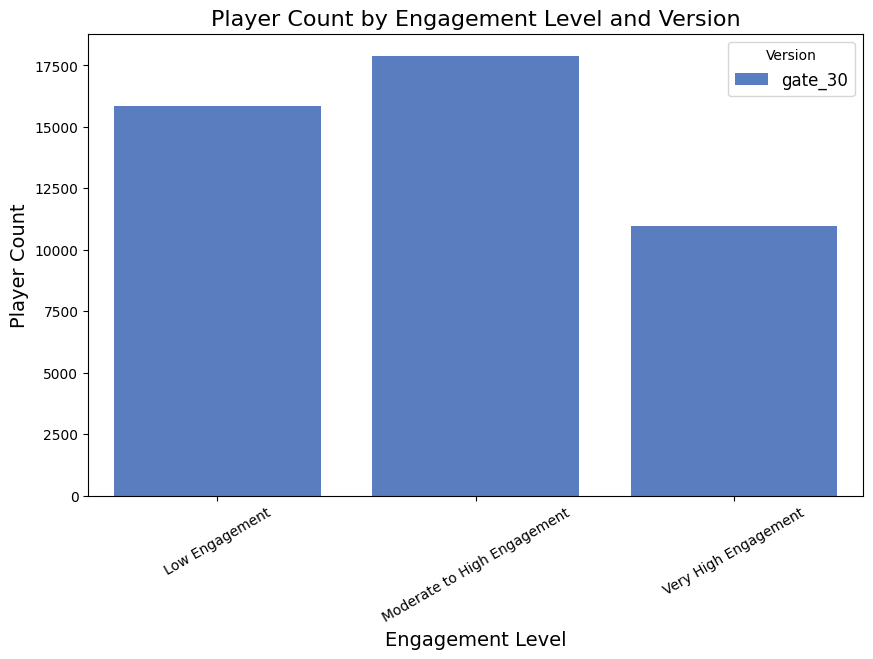

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by engagement level and version, and calculate player count
player_count_data = sum_gamerounds_version_30.groupby(['engagement_level_version_30', 'version']).agg(player_count=('userid', 'count')).reset_index()
print(player_count_data)
# Plot a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=player_count_data, 
    x='engagement_level_version_30', 
    y='player_count', 
    hue='version', 
    palette='muted'
)

# Add titles and labels
plt.title('Player Count by Engagement Level and Version', fontsize=16)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Player Count', fontsize=14)
plt.legend(title='Version', fontsize=12)

plt.xticks(rotation=30) 
plt.show()



   engagement_level_version_40  version  player_count
0               Low Engagement  gate_40         15282
1  Moderate to High Engagement  gate_40         18723
2         Very High Engagement  gate_40         11484


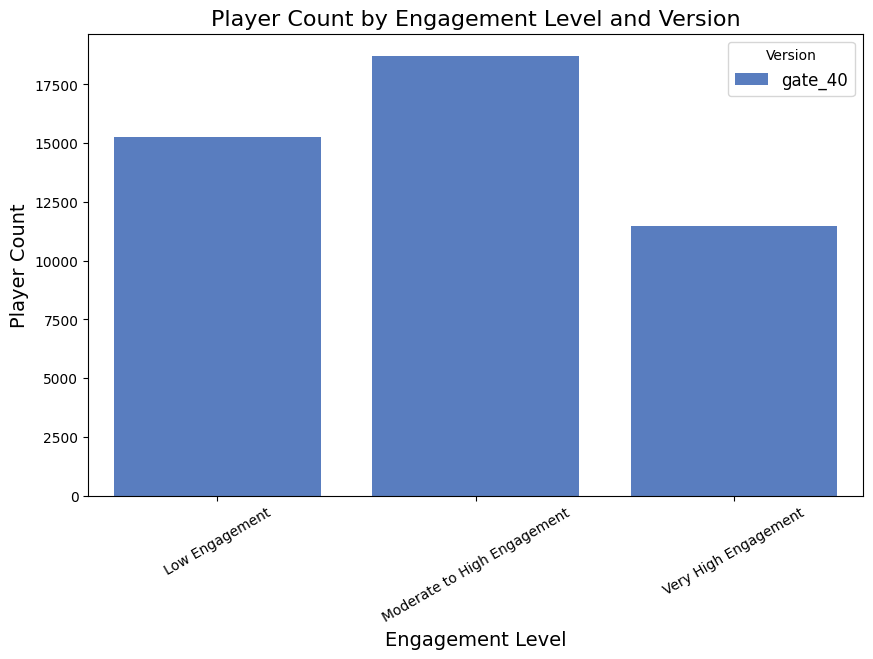

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by engagement level and version, and calculate player count
player_count_data_40 = sum_gamerounds_version_40.groupby(['engagement_level_version_40', 'version']).agg(player_count=('userid', 'count')).reset_index()
print(player_count_data_40)
# Plot a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=player_count_data_40, 
    x='engagement_level_version_40', 
    y='player_count', 
    hue='version', 
    palette='muted'
)

# Add titles and labels
plt.title('Player Count by Engagement Level and Version', fontsize=16)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Player Count', fontsize=14)
plt.legend(title='Version', fontsize=12)

plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()



In [268]:
print(player_count_data)
print(player_count_data_40)

   engagement_level_version_30  version  player_count
0               Low Engagement  gate_30         15837
1  Moderate to High Engagement  gate_30         17894
2         Very High Engagement  gate_30         10968
   engagement_level_version_40  version  player_count
0               Low Engagement  gate_40         15282
1  Moderate to High Engagement  gate_40         18723
2         Very High Engagement  gate_40         11484


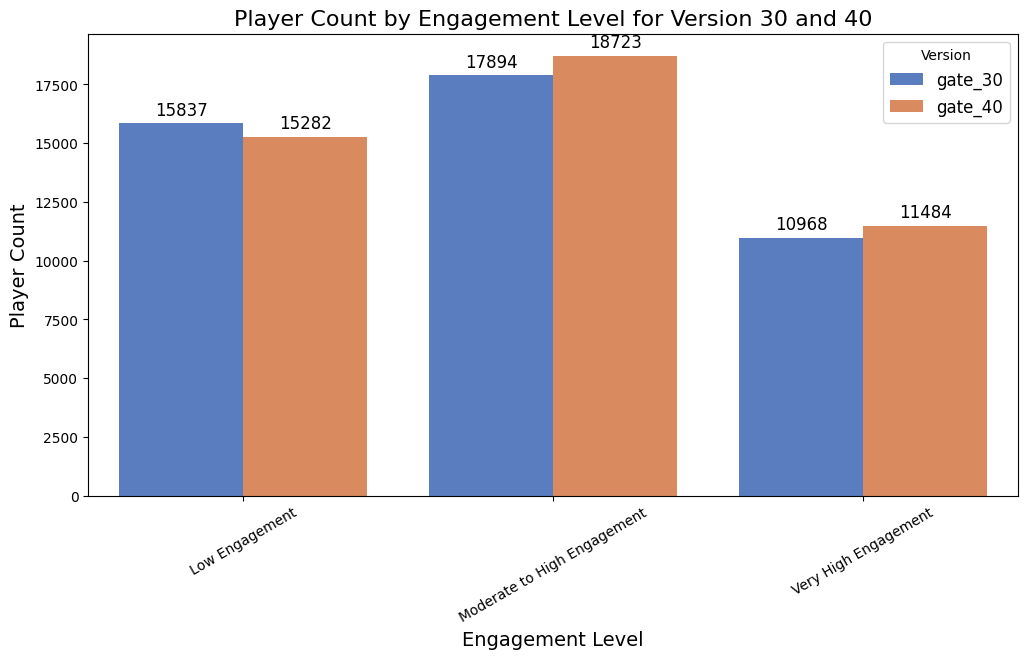

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrames for version_30 and version_40
data_version_30 = pd.DataFrame({
    'engagement_level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'],
    'version': ['gate_30'] * 3,
    'player_count': [15837, 17894, 10968]
})

data_version_40 = pd.DataFrame({
    'engagement_level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'],
    'version': ['gate_40'] * 3,
    'player_count': [15282, 18723, 11484]
})

# Combine the two DataFrames into one for grouped bar plotting
combined_data = pd.concat([data_version_30, data_version_40])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=combined_data,
    x='engagement_level',
    y='player_count',
    hue='version',
    palette='muted'
)

# Add titles and labels
plt.title('Player Count by Engagement Level for Version 30 and 40', fontsize=16)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Player Count', fontsize=14)
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(title='Version', fontsize=12)

# Annotate each bar with player count values
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Show the plot
plt.show()


Version_40 shows more players in high engagement categories, let's find out how player engagement and retention is related.For that we need to find out retention of players in each of this player categories on day 1 and day 7 for both versions

In [270]:
#filtering the data for players who came back for both versions
#filtering for day 1
retention1_true_version_30 = sum_gamerounds_version_30[(sum_gamerounds_version_30['retention_1'] ==True )]
retention1_true_version_40 = sum_gamerounds_version_40[(sum_gamerounds_version_40['retention_1'] ==True )]
#filtering for day 7
retention7_true_version_30 = sum_gamerounds_version_30[(sum_gamerounds_version_30['retention_7'] ==True )]
retention7_true_version_40 = sum_gamerounds_version_40[(sum_gamerounds_version_40['retention_7'] ==True )]


In [272]:
#category retention for day 1 for both versions
#for version_30
category_retentionday1_version30 = retention1_true_version_30.groupby(['retention_1','engagement_level_version_30'])
version_30_cat_retention1 = category_retentionday1_version30.size()
#for version_40
category_retentionday1_version40 = retention1_true_version_40.groupby(['retention_1','engagement_level_version_40'])
version_40_cat_retention1 = category_retentionday1_version40.size()
#printing the values for day 1
print(version_30_cat_retention1)
print(version_40_cat_retention1)
#category retention for day 7 for both versions
#for version_30
category_retentionday7_version30 = retention7_true_version_30.groupby(['retention_7','engagement_level_version_30'])
version_30_cat_retention7 = category_retentionday7_version30.size()
#for version_40
category_retentionday7_version40 = retention7_true_version_40.groupby(['retention_7','engagement_level_version_40'])
version_40_cat_retention7 = category_retentionday7_version40.size()
#printing values for day 7
print(version_30_cat_retention7)
print(version_40_cat_retention7)

retention_1  engagement_level_version_30
True         Low Engagement                 1504
             Moderate to High Engagement    9068
             Very High Engagement           9462
dtype: int64
retention_1  engagement_level_version_40
True         Low Engagement                 1362
             Moderate to High Engagement    8964
             Very High Engagement           9793
dtype: int64
retention_7  engagement_level_version_30
True         Low Engagement                  244
             Moderate to High Engagement    2033
             Very High Engagement           6224
dtype: int64
retention_7  engagement_level_version_40
True         Low Engagement                  235
             Moderate to High Engagement    1814
             Very High Engagement           6230
dtype: int64


C:\Users\Lachu\AppData\Local\Temp\ipykernel_18336\2794450008.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


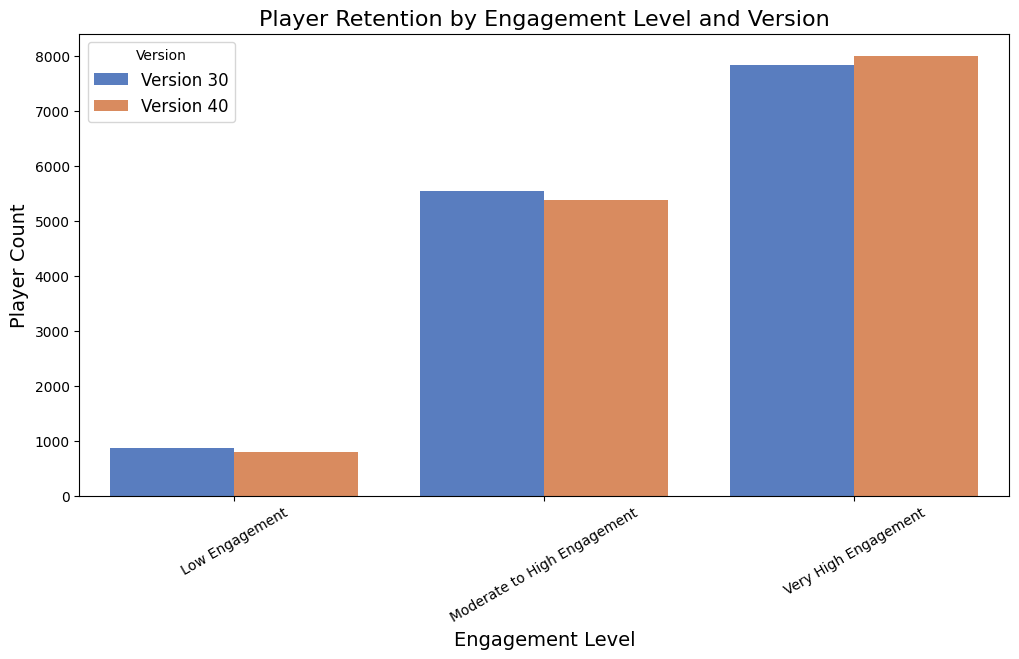

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data into DataFrames for retention_1 and retention_7
data_retention_1 = pd.DataFrame({
    'Retention': 'Day 1',
    'Engagement Level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'] * 2,
    'Version': ['Version 30'] * 3 + ['Version 40'] * 3,
    'Count': [1504, 9068, 9462, 1362, 8964, 9793]
})

data_retention_7 = pd.DataFrame({
    'Retention': 'Day 7',
    'Engagement Level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'] * 2,
    'Version': ['Version 30'] * 3 + ['Version 40'] * 3,
    'Count': [244, 2033, 6224, 235, 1814, 6230]
})

# Combine both into one DataFrame for easier plotting
data_combined = pd.concat([data_retention_1, data_retention_7])

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data_combined, 
    x='Engagement Level', 
    y='Count', 
    hue='Version', 
    ci=None, 
    palette='muted'
)

# Add titles and labels
plt.title('Player Retention by Engagement Level and Version', fontsize=16)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Player Count', fontsize=14)
plt.legend(title='Version', fontsize=12)
plt.xticks(rotation=30)
plt.show()


C:\Users\Lachu\AppData\Local\Temp\ipykernel_19736\537473877.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


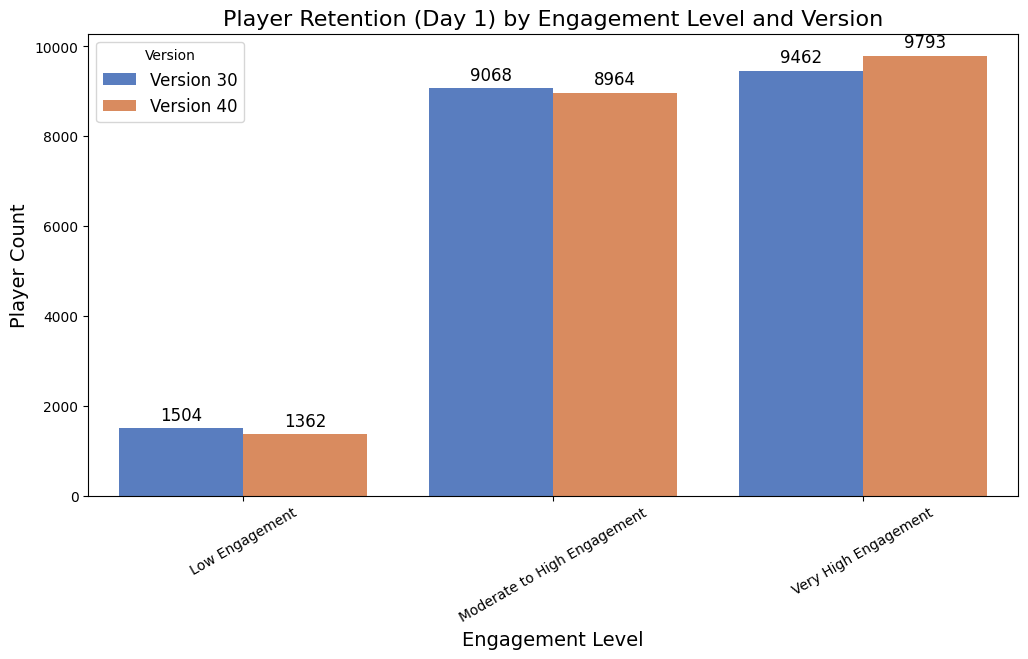

C:\Users\Lachu\AppData\Local\Temp\ipykernel_19736\537473877.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


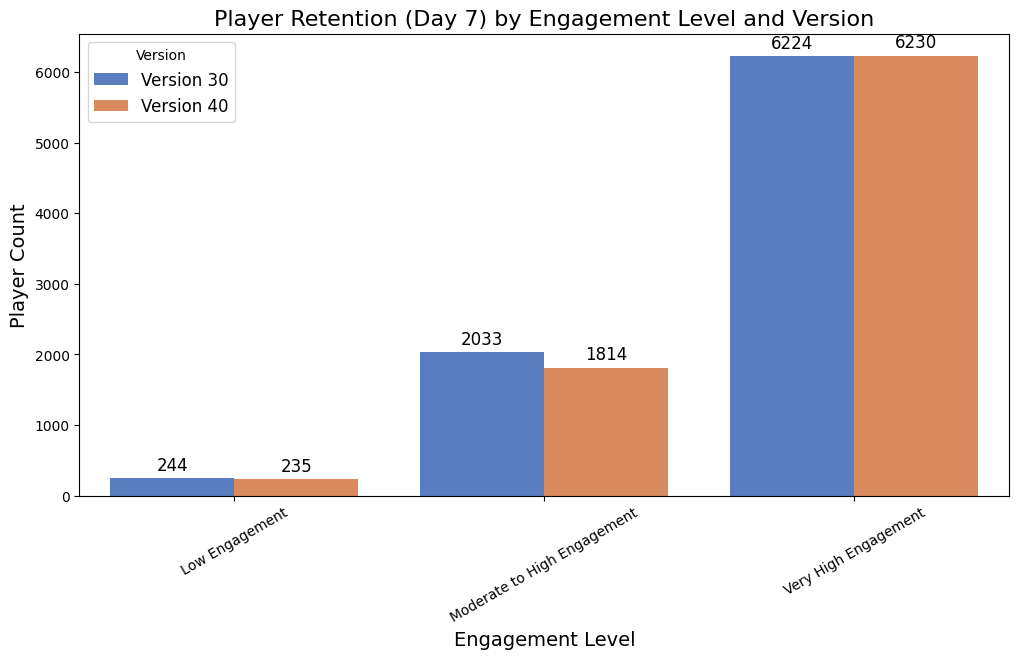

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrames for retention_1 and retention_7
data_retention_1 = pd.DataFrame({
    'Retention': 'Day 1',
    'Engagement Level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'] * 2,
    'Version': ['Version 30'] * 3 + ['Version 40'] * 3,
    'Count': [1504, 9068, 9462, 1362, 8964, 9793]
})

data_retention_7 = pd.DataFrame({
    'Retention': 'Day 7',
    'Engagement Level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'] * 2,
    'Version': ['Version 30'] * 3 + ['Version 40'] * 3,
    'Count': [244, 2033, 6224, 235, 1814, 6230]
})

# Function to plot and annotate bar charts
def plot_and_annotate(data, title):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=data, 
        x='Engagement Level', 
        y='Count', 
        hue='Version', 
        ci=None, 
        palette='muted'
    )
    plt.title(title, fontsize=16)
    plt.xlabel('Engagement Level', fontsize=14)
    plt.ylabel('Player Count', fontsize=14)
    plt.legend(title='Version', fontsize=12)
    plt.xticks(rotation=30)
    
    # Annotate each bar with player count values
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)
    
    plt.show()

# Plot and annotate for Day 1 retention
plot_and_annotate(data_retention_1, 'Player Retention (Day 1) by Engagement Level and Version')

# Plot and annotate for Day 7 retention
plot_and_annotate(data_retention_7, 'Player Retention (Day 7) by Engagement Level and Version')


c:\Users\Lachu\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Lachu\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Lachu\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lachu\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


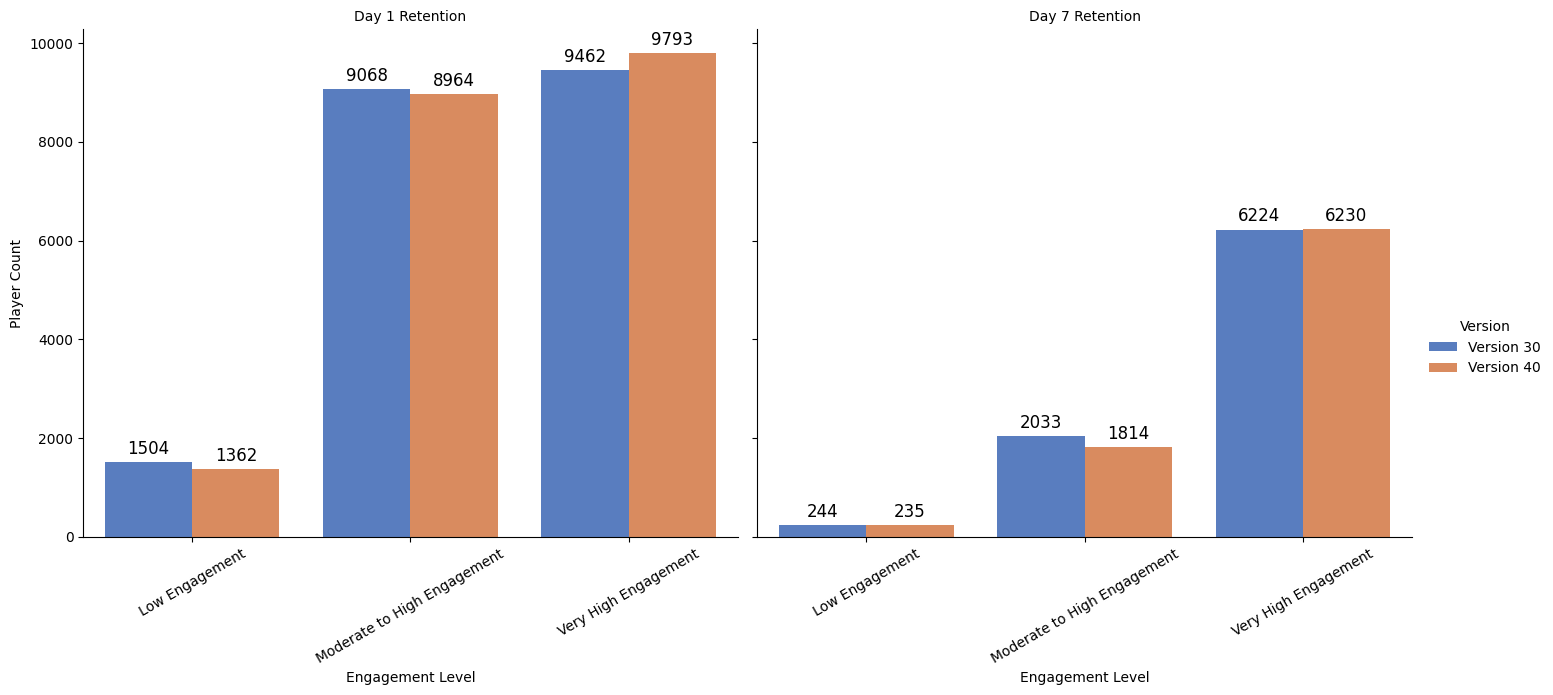

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data into DataFrames for retention_1 and retention_7
data_retention_1 = pd.DataFrame({
    'Retention': 'Day 1',
    'Engagement Level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'] * 2,
    'Version': ['Version 30'] * 3 + ['Version 40'] * 3,
    'Count': [1504, 9068, 9462, 1362, 8964, 9793]
})

data_retention_7 = pd.DataFrame({
    'Retention': 'Day 7',
    'Engagement Level': ['Low Engagement', 'Moderate to High Engagement', 'Very High Engagement'] * 2,
    'Version': ['Version 30'] * 3 + ['Version 40'] * 3,
    'Count': [244, 2033, 6224, 235, 1814, 6230]
})

# Combine both into one DataFrame for easier plotting
data_combined = pd.concat([data_retention_1, data_retention_7])

# Create a FacetGrid to plot separate charts for Day 1 and Day 7
g = sns.FacetGrid(
    data_combined, 
    col='Retention', 
    height=6, 
    aspect=1.2, 
    palette='muted'
)

g.map(
    sns.barplot, 
    'Engagement Level', 
    'Count', 
    'Version', 
    ci=None, 
    palette='muted'
)

# Add titles and rotate x-tick labels
g.set_titles("{col_name} Retention")
g.set_axis_labels("Engagement Level", "Player Count")
g.set_xticklabels(rotation=30)
g.add_legend(title='Version')

# Annotate bars with player counts
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

plt.show()


### Observations on player engagement and retention pattern
From the graphs retention of players in different categories of engagement doesn't change significantly by pushing the gate to level 40. <br>
In short term retention(day1 retention) number of High Engagement Players are marginally high for version_40 while in the other 2 categories(low,moderate players) version_30 retains more.<br>
In long term retention(day 7 retention) number of High engagement players are almost equal for both versions, but version_30 retains more players in moderate to high category <br>
If the gate placement at level 40 targets high engagement players , then it's not showing showing any significant improvemnt in that category .<br>
But when you look at moderate to high and low engagement group more retention is for version_30.


